<h1><center>Lab Assignment 3</center></h1>

<center> DUE: <font color = 'blue'> Thursday, October 19 by 2:59 PM (EST)</font> via Canvas </center>

Please submit:

1) a PDF with all code in-line, generated from Jupytor Notebook
      - If there is an error when you generate pdf, please refer this.
  [4 ways to export Jupyter Notebook as PDF](https://mljar.com/blog/jupyter-notebook-pdf/#:~:text=The%20Jupyter%20Notebook%20has%20an,not%20visible%20in%20the%20screenshot)
      - <font color = red>If you submit your result as ipynb extension, you will deduct points.</font>

<h3><center>[Your Name Here]</center></h3>

### Problem Description

The price of a used car depends on various factors such as mileage, make, model, engine capacity, interior style and geographic location. Given a partial database of the Kelley Blue Book (`lab3_data.csv`), you will learn how multiple regression can be used to estimate a car’s price.
 
**Round your answers to two decimal places, and include all code and figures.**
(In this assignment, you will not need to use Excel.)

In [17]:
import numpy as np                    #to use matrix operations
import pandas as pd                   #to handle data
import matplotlib.pyplot as plt       #to draw plot
import statsmodels.api as sm          #to use statistical model
import statsmodels.formula.api as smf #to use statistical model

#### (a) (2 points)

**Using Python, draw a scatter plot of price ($y$) vs. mileage ($x$).** 

In [18]:
df = pd.read_csv("lab3_data.csv")
df.head()

,Price,Mileage,Liter,Doors,Cruise,Sound,Leather,IsPontiac
0,12147.18803,10011,1.6,4,0,0,1,0
1,12163.82042,12101,1.6,4,0,0,1,0
2,11472.02276,19699,1.6,4,0,0,1,0
3,11017.16871,20100,1.6,4,0,1,0,0
4,11096.85727,20334,1.6,4,1,0,0,0


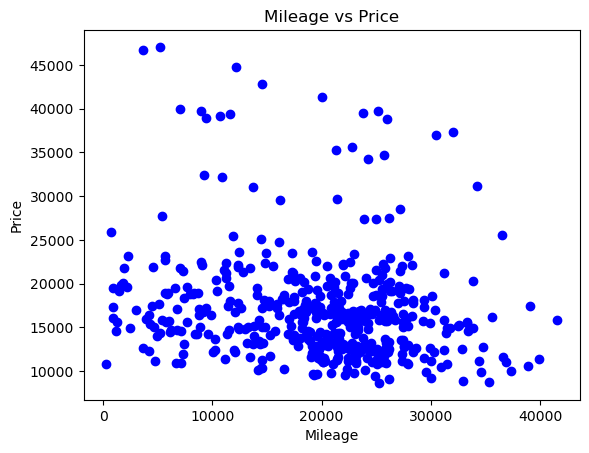

In [19]:


x = 'Mileage'  
y = 'Price'  

plt.scatter(df[x], df[y], color='blue', marker='o')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.title('Mileage vs Price')
plt.show()

#### (b) (4 points)

**Using Python, obtain the coefficients of the simple linear regression equation explaining the relationship between price (as a response variable) and mileage (as an explanatory variable). What is the coefficient of determination of this model?**

In [20]:
lm_model = smf.ols(
        formula = 'Price ~ Mileage',data=df).fit()
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     15.89
Date:                Mon, 16 Oct 2023   Prob (F-statistic):           7.79e-05
Time:                        01:37:18   Log-Likelihood:                -4763.6
No. Observations:                 470   AIC:                             9531.
Df Residuals:                     468   BIC:                             9540.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.976e+04    732.493     26.972      0.000    1.83e+04    2.12e+04
Mileage       -0.1378      0.035     -3.986      0.000      -0.206      -0.070
==============================================================================
Omnibus:                      222.808   Durbin-Watson:                   0.112
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              992.268
Skew:                           2.141   Prob(JB):                    3.40e-216
Kurtosis:                       8.686   Cond. No.                     5.50e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.5e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Answer**
The coefficents explaining the relationship is the Mileage and the price which can be modeled by y = -0.1378x + 1.976e+04. The coefficent of determination AKA R-Squared is 0.033. 

#### (c) (3 points)

In part (b), you may observe that the coefficient of determination is small despite model significance being strongly supported. That is, a significant model may explain very little about the observed variation in $y$. **Does this make sense to you? Please provide a brief explanation of this phenomenon.**

**Answer**

Yes, this does make sense to me because we have a situation where we have a small p-value and a small R-Squared value to go alongside that. It is also possible to have a significant model with a low R-Squared because practical and statistical significance arent the same thing. Other factors (other variables) cause noise that explain other variations. 



#### (d) (4 points)

**Using Python, obtain the coefficients of the multiple linear regression equation explaining the relationship between price (as a response variable) and all the other characteristics of a car (mileage, liters, doors, cruise, sound, leather, and isPontiac). Does the coefficient of determination differ from your model in part (b)?**

In [21]:
lm_model = smf.ols(
        formula = 'Price ~ Mileage + Liter + Doors + Cruise + Sound + Leather + IsPontiac',data=df).fit()
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     293.1
Date:                Mon, 16 Oct 2023   Prob (F-statistic):          1.67e-165
Time:                        01:37:20   Log-Likelihood:                -4373.3
No. Observations:                 470   AIC:                             8763.
Df Residuals:                     462   BIC:                             8796.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   8064.8579    849.606      9.492      0.000    6395.286    9734.430
Mileage       -0.1442      0.015     -9.478      0.000      -0.174      -0.114
Liter       4668.3022    125.358     37.240      0.000    4421.961    4914.644
Doors       -480.9547    147.948     -3.251      0.001    -771.689    -190.221
Cruise      -270.2777    292.825     -0.923      0.356    -845.712     305.157
Sound       -853.9114    316.269     -2.700      0.007   -1475.415    -232.408
Leather      367.4470    314.004      1.170      0.243    -249.606     984.500
IsPontiac    -51.0169    282.506     -0.181      0.857    -606.174     504.140
==============================================================================
Omnibus:                      135.422   Durbin-Watson:                   0.218
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              400.050
Skew:                           1.360   Prob(JB):                     1.35e-87
Kurtosis:                       6.609   Cond. No.                     1.49e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

With the added variables, the R_Squared value took a hige jump from 0.033 to 0.816. This means that the added variables to the equation help explain the relationship much better. 

#### (e) (3 points)

**How will your round trip to Bloomington from Ann Arbor (total: 634 miles) affect the expected price of your car?** (Assume that your car is well explained by the regression model in (d) and the car specification remains the same throughout the trip.)

**Answer**

For a 634-mile round trip, you can estimate the price change as follows:

Price Change = Mileage Coefficient * Miles Driven
Price Change = (-0.1442) * 634

Price Change ≈ -91.49

Therefore the expected price change is -$91.49

#### (f) (4 points)

**Calculate manually a 95% confidence interval for the change in expected price associated with a 1-unit increase in mileage while all other explanatory variables are held fixed.**
**Provide all steps used to arrive at your final answer. You can use the information in the linear regression model summary in question (d).**

(*Hint*: use the following critical $t$-value for $\alpha=0.05$, $n=470$, and $k=7$: $t_{\alpha/2,\,n-(k+1)}=1.96511$.)

**Answer**

Standard Error of the Estimate (SE):
SE = Standard Error for Mileage = 0.015

Critical t-value (α/2 = 0.025, df = 470 - (7 + 1) = 462):
From the hint, t(α/2, 462) ≈ 1.96511

Margin of Error (ME):
ME = t(α/2, 462) * SE = 1.96511 * 0.015 ≈ 0.02947

Confidence Interval:

Change in Price = Mileage Coefficient = -0.1442 (from the regression output)

Lower Limit of Confidence Interval: Change in Price - ME = -0.1442 - 0.02947 ≈ -0.1737
Upper Limit of Confidence Interval: Change in Price + ME = -0.1442 + 0.02947 ≈ -0.1147


THEREFORE: (-0.1737, -0.1147)